# model building using CNN

# step 1 import necessary libraries 

In [90]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential, load_model
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from sklearn.metrics import accuracy_score

# step 2 extract the path for training, testing and label images 

In [106]:
data=[]
labels=[]
no_classes=43
dir=os.getcwd()

for i in range(no_classes):
    path=os.path.join(dir+'\datasets\\Train',str(i))
    images=os.listdir(path)
    # print(path)
    # print(images)
    for a in images:
        try:  
            # print(path+'\\'+a)
            image=Image.open(path+'\\'+a)
            image=image.resize((30,30))
            image=np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print('error loading image')
  

# step 3: read the images and convert to numpy arrays 

In [108]:
data=np.array(data)
labels=np.array(labels)
print(labels)
data.shape, labels.shape

[ 0  0  0 ... 42 42 42]


((39209, 30, 30, 3), (39209,))

# step 4: split the training set

In [109]:
xtrain,xtest,ytrain,ytest=train_test_split(data,labels,test_size=0.2,random_state=42)
xtrain.shape, ytrain.shape, xtest.shape, ytest.shape

((31367, 30, 30, 3), (31367,), (7842, 30, 30, 3), (7842,))

# step 5: convert the label using one hot encoding 

In [110]:
ytrain=to_categorical(ytrain,43)
ytest=to_categorical(ytest,43)
ytrain.shape, ytest.shape

((31367, 43), (7842, 43))

# step 6: build the CNN model

In [111]:
model=Sequential([
    Conv2D(filters=32,kernel_size=(5,5),activation='relu',input_shape=((30,30,3))),
    Conv2D(filters=32,kernel_size=(5,5),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),

    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    Conv2D(filters=64,kernel_size=(3,3),activation='relu'),
    MaxPool2D(pool_size=(2,2)),
    Dropout(0.25),

    Flatten(),
    Dense(256,activation='relu'),
    Dropout(0.5),
    Dense(43,activation='softmax'),
    
])

# step 7 compile the model

In [112]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
history=model.fit(xtrain,ytrain,epochs=15,validation_data=(xtest,ytest))
model.save('train_data.h5')

Epoch 1/15
981/981 [==============================] - 6s 5ms/step - loss: 1.8429 - accuracy: 0.5241 - val_loss: 0.4290 - val_accuracy: 0.8940
Epoch 2/15
981/981 [==============================] - 5s 5ms/step - loss: 0.6158 - accuracy: 0.8211 - val_loss: 0.1818 - val_accuracy: 0.9487
Epoch 3/15
981/981 [==============================] - 5s 5ms/step - loss: 0.4392 - accuracy: 0.8724 - val_loss: 0.1601 - val_accuracy: 0.9489
Epoch 4/15
981/981 [==============================] - 5s 5ms/step - loss: 0.3269 - accuracy: 0.9050 - val_loss: 0.1238 - val_accuracy: 0.9642
Epoch 5/15
981/981 [==============================] - 5s 5ms/step - loss: 0.3008 - accuracy: 0.9153 - val_loss: 0.1260 - val_accuracy: 0.9629
Epoch 6/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2760 - accuracy: 0.9230 - val_loss: 0.0644 - val_accuracy: 0.9827
Epoch 7/15
981/981 [==============================] - 5s 5ms/step - loss: 0.2481 - accuracy: 0.9308 - val_loss: 0.1238 - val_accuracy: 0.9615
Epoch 

# step 8: train and validate the model (hyper papameter tuning )

# step 9: plot the accuracy and loss

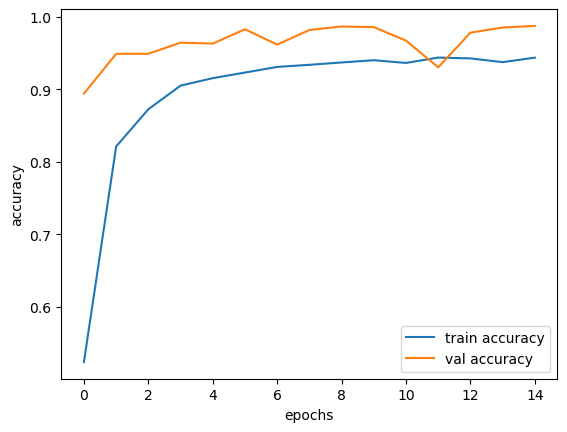

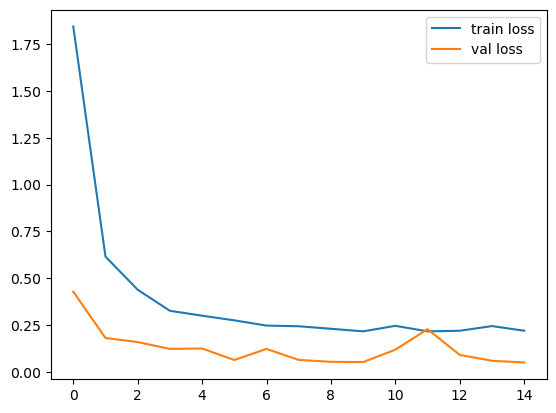

In [113]:
plt.plot(history.history['accuracy'],label='train accuracy')
plt.plot(history.history['val_accuracy'],label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'],label='train loss')
plt.plot(history.history['val_loss'],label='val loss')
plt.legend()
plt.show()

# step 10: load the test data along with labels

In [114]:
dir=os.getcwd()
path=os.path.join(dir,'datasets\\Test')
images=os.listdir(path)
# print(images)
test_images=[]

for i in images:
    # print(i)
    image=Image.open(path+'\\'+i)
    image=image.resize((30,30))
    image=np.array(image)
    test_images.append(image)
test_images
test_images=np.array(test_images)
test_images.shape

(12630, 30, 30, 3)

# step 11 predict the class

In [117]:
pred=model.predict(test_images)

pred_classes=[]
for i in range(pred.shape[0]):
    pred_classes.append(np.argmax(pred[i]))
pred_classes=np.array(pred_classes)
labels1=pd.read_csv('datasets/Test.csv')
labels1=labels1['ClassId'].values
labels1=np.array(labels1)

print(f'accuracy of Test results:{accuracy_score(labels1,pred_classes)}')

pred2=model.predict(np.array(data))

pred_classes2=[]
for i in range(pred2.shape[0]):
    pred_classes2.append(np.argmax(pred2[i]))
pred_classes2=np.array(pred_classes2)
# print(pred_classes2.shape,data.shape)
labels.shape, pred_classes2.shape
print(f'accuracy of Train results:{accuracy_score(labels,pred_classes2)}')

395/395 [==============================] - 1s 2ms/step
accuracy of Test results:0.94972288202692
1226/1226 [==============================] - 3s 2ms/step
accuracy of Train results:0.9899512866943814
